/var/folders/st/n5b89ytn4b98348x0tqzx3bh0000gn/T/ipykernel_70212/2122103058.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n + 1, i] = u[n, i] + alpha * dt * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1]) / dx**2
/var/folders/st/n5b89ytn4b98348x0tqzx3bh0000gn/T/ipykernel_70212/2122103058.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n + 1, 0] = (4 * u[n + 1, 1] - u[n + 1, 2] + 2 * dx * h1 / K * T_ext1) / (3 + 2 * dx * h1 / K)
/var/folders/st/n5b89ytn4b98348x0tqzx3bh0000gn/T/ipykernel_70212/2122103058.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you 

[0.]
0.0 0.0 0.0 0.0 0.0 0.0
[300.030003]
15.757082495403868 12.13852294201639 9.230764122491081 6.541158807768854 8.664756794852705 11.33137678008021
[600.060006]
35.4341297056833 29.57840334091416 24.53292662727876 18.55790601333152 22.491451634486676 27.085717221695244
[900.090009]
40.480554257197845 36.46348308683955 32.59576043568483 26.268535421523794 29.617263074447422 33.14800457580457
[1200.120012]
42.225558278994505 38.923398396738165 35.7002986949556 29.853313693324385 32.75504085523173 35.76222518845382
[1500.150015]
43.24783789477393 40.37123112540457 37.54597742398125 32.13465783722103 34.733713060688835 37.404681030700615
[1800.180018]
43.94514761007438 41.36103947566056 38.813832106526675 33.76538134925358 36.14162020462956 38.571183396859986
[2100.210021]
44.46124569578196 42.09462158048198 39.7561971642773 35.010391063986866 37.21347481717265 39.45822693630468
[2400.240024]
44.86360914888081 42.66706848645403 40.49299848810057 36.00299395383062 38.06636354803574 40.16

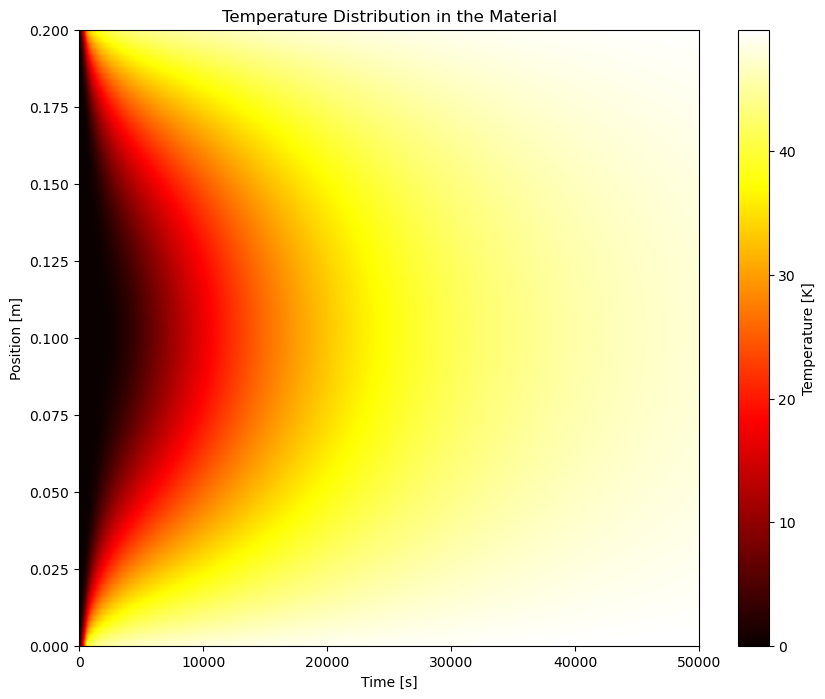

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
K = 0.47  # 熱伝導率 [W/mK]
rho = 1573  # 密度 [kg/m³]
cp = 967  # 比熱 [J/kgK]
alpha = K / (rho * cp)  # 熱拡散率
# print(alpha)

h1 = 100  # 上の対流熱伝達係数 [W/m²K]
h2 = 50  # 下の対流熱伝達係数 [W/m²K]
# T_ext1 = 50  # 上の外部温度 [K]（例）
# T_ext2 = 50  # 下の外部温度 [K]（例）

# グリッドの設定
x = np.linspace(0, 0.2, 100)[:, None]  # 空間グリッド
t = np.linspace(0, 50000, 10000)[:, None]  # 時間グリッド

dx = x[1] - x[0]  # 空間ステップ
dt = t[1] - t[0]  # 時間ステップ

Nx = len(x)
Nt = len(t)

# 初期条件
u = np.zeros((Nt, Nx))  # 初期温度を0Kと仮定

# # 境界条件の設定
# u[:, 0] = T_ext1
# u[:, -1] = T_ext2


# print(u)
# print(u.shape)

# 数値解法の実装（前進オイラー法と中央差分法）
for n in range(0, Nt - 1):
    if t[n] <= 600:
        T_ext1 = T_ext2 = 0 + (50 - 0) * t[n] / 600
    else:
        T_ext1 = T_ext2 = 50
    # print(T_ext1, T_ext2)
    for i in range(1, Nx - 1):
        u[n + 1, i] = u[n, i] + alpha * dt * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1]) / dx**2

    # 境界条件の適用
    # 左端の対流境界条件
    u[n + 1, 0] = (4 * u[n + 1, 1] - u[n + 1, 2] + 2 * dx * h1 / K * T_ext1) / (3 + 2 * dx * h1 / K)

    # 右端の対流境界条件
    u[n + 1, -1] = (4 * u[n + 1, -2] - u[n + 1, -3] + 2 * dx * h2 / K * T_ext2) / (3 + 2 * dx * h2 / K)
    # if n % 100 == 0:
    if n % 60 == 0:
        print(t[n])
        print(u[n + 1, 0], u[n + 1, 1], u[n + 1, 2], u[n + 1, -3], u[n + 1, -2], u[n + 1, -1])

# 結果のプロット
plt.figure(figsize=(10, 8))
plt.imshow(u.T, extent=[0, 50000, 0, 0.2], aspect='auto', origin='lower', cmap='hot')
plt.colorbar(label='Temperature [K]')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.title('Temperature Distribution in the Material')
plt.show()

# # 任意の時刻における温度プロファイルのラインプロット
# times_to_plot = [0, 600, 1200, 1800, 2400, 3000, 3600]  # プロットする時間（秒）
# plt.figure(figsize=(10, 6))
# for time in times_to_plot:
#     plt.plot(x, u[int(time / dt), :], label=f't = {time} s')
# plt.xlabel('Position [m]')
# plt.ylabel('Temperature [K]')
# plt.title('Temperature Profile at Different Times')
# plt.legend()
# plt.show()